In [7]:
import numpy as np

f = open('/content/drive/MyDrive/B455/Project 5/Admission_Predict_Ver1.1.csv')

feature_names = f.readline()[:-2].split(',')
data = np.genfromtxt(f, delimiter=',')

#drop the Serial No. column because it is uninformative
data = data[:,1:]
feature_names = feature_names[1:]

X = data[:,:-1]
y = data[:,-1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

MLP - Regression

Choices:

Activation function - The output is a probability in the range (0, 1) which should mean that a sigmoid activation function is better but I was able to get a lower sse during cross-calidation with a ReLU activation. 

Solver - I don't entirely understand what the lbfgs solver does but the SKLearn API says it is good on smaller datasets. Here I was able to get a lower sse with lbfgs over sgd which is why I shose lbfgs.

Number of epochs completed: 281
sse = 0.3305220569611894
|    |   actual |   predicted |   difference |
|---:|---------:|------------:|-------------:|
|  0 |     0.94 |    0.906767 |  0.0332334   |
|  1 |     0.7  |    0.740463 | -0.0404627   |
|  2 |     0.9  |    0.919192 | -0.0191918   |
|  3 |     0.72 |    0.617048 |  0.102952    |
|  4 |     0.75 |    0.693299 |  0.0567013   |
|  5 |     0.72 |    0.701109 |  0.0188907   |
|  6 |     0.92 |    0.883537 |  0.0364625   |
|  7 |     0.57 |    0.610092 | -0.0400923   |
|  8 |     0.52 |    0.495206 |  0.0247938   |
|  9 |     0.84 |    0.733804 |  0.106196    |
| 10 |     0.94 |    0.951665 | -0.0116647   |
| 11 |     0.52 |    0.569122 | -0.0491218   |
| 12 |     0.64 |    0.623921 |  0.016079    |
| 13 |     0.72 |    0.682292 |  0.0377085   |
| 14 |     0.71 |    0.632344 |  0.0776563   |
| 15 |     0.62 |    0.65782  | -0.0378195   |
| 16 |     0.61 |    0.631163 | -0.0211634   |
| 17 |     0.76 |    0.767218 | -0.007218    |
| 1

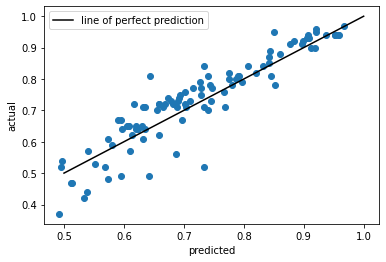

In [8]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(50,25),
                    momentum=0.75,
                    learning_rate_init=0.00005,
                    max_iter=5000,
                    validation_fraction=0.25,
                    batch_size=10,
                    early_stopping=True,
                    shuffle=True,
                    activation='relu',
                    solver='lbfgs',
                    learning_rate='constant',
                    random_state=5,
                    verbose=False)

mlp = mlp.fit(X_train, y_train)

pred = mlp.predict(X_test)

print(f'Number of epochs completed: {mlp.n_iter_}')
print(f'sse = {np.sum((pred - y_test)**2)}')

import pandas as pd

df = pd.DataFrame(data={'actual': y_test, 'predicted': pred, 'difference': y_test - pred})
print(df.to_markdown())

import matplotlib.pyplot as plt

plt.scatter(pred, y_test)
plt.plot([0.5,1], [0.5,1], color='k', label='line of perfect prediction')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.legend(loc='best')

This MLP performs pretty well, predicting the value to within ~5 hundreths of the actual for most of the testing set. There are a few outliers which that (points 51, 52, 94) that are poorly predicted but overall, not bad. The error plot above shows that generally the prediction is more accurate as the real percentage increases.

Linear Regression

sse = 0.3246757305955682
Coefficients: [0.00210134 0.00262971 0.00664056 0.00128658 0.01488505 0.11474722
 0.02836141]
|    |   real |   predicted |   difference |
|---:|-------:|------------:|-------------:|
|  0 |   0.94 |    0.932246 |  0.00775402  |
|  1 |   0.7  |    0.695703 |  0.00429677  |
|  2 |   0.9  |    0.938743 | -0.0387425   |
|  3 |   0.72 |    0.618179 |  0.101821    |
|  4 |   0.75 |    0.710455 |  0.0395453   |
|  5 |   0.72 |    0.709428 |  0.0105717   |
|  6 |   0.92 |    0.894453 |  0.025547    |
|  7 |   0.57 |    0.587855 | -0.0178552   |
|  8 |   0.52 |    0.505035 |  0.0149652   |
|  9 |   0.84 |    0.737627 |  0.102373    |
| 10 |   0.94 |    0.962607 | -0.0226066   |
| 11 |   0.52 |    0.590377 | -0.0703766   |
| 12 |   0.64 |    0.622089 |  0.0179111   |
| 13 |   0.72 |    0.698773 |  0.0212273   |
| 14 |   0.71 |    0.638054 |  0.0719463   |
| 15 |   0.62 |    0.644488 | -0.024488    |
| 16 |   0.61 |    0.655626 | -0.045626    |
| 17 |   0.76 |    0.76081

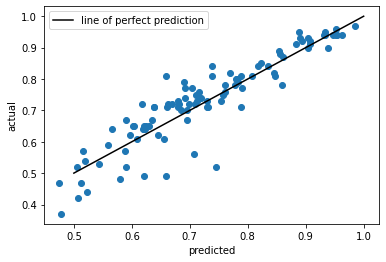

In [9]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(normalize=True, copy_X=False).fit(X_train, y_train)

pred = linreg.predict(X_test)

print(f'sse = {np.sum((pred - y_test)**2)}')
print(f'Coefficients: {linreg.coef_}')

df = pd.DataFrame(data={'real': y_test, 'predicted': pred, 'difference': y_test - pred})
print(df.to_markdown())

plt.scatter(pred, y_test)
plt.plot([0.5,1], [0.5,1], color='k', label='line of perfect prediction')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.legend(loc='best')

In terms of sse, linear regression actually does ever so slightly better my MLP which is a little surprising. This mainly comes down to eliminating the outliers in the MLP prediction. At a quick glance the error plots are almost identicle which leads me to believe the data is strongly linearily correlated

Transforming it into a classification problem

Ideally I would split the classes at p=0.5 meaning the classes would correspond to "likely" or "not likely" to get into college. However, ~93% of the data is above p=0.5 so I chose a split point that creates an equal number of both classes. At p=0.725, there are 248 points above that and 252 which is as equal as possible.

In [10]:
#splits y data in classes 0 and 1
y_class = np.array([1 if item >= 0.725 else 0 for item in y])

#standardize X
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

X_train_std, X_test_std, y_train_class, y_test_class = train_test_split(X_std, y_class, test_size=0.2, random_state=55)

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,10),
                    momentum=0.75,
                    learning_rate_init=0.00001,
                    max_iter=1000,
                    validation_fraction=0.25,
                    batch_size=10,
                    early_stopping=True,
                    shuffle=True,
                    activation='relu',
                    solver='lbfgs',
                    learning_rate='constant',
                    random_state=23,
                    verbose=False)

mlp = mlp.fit(X_train_std, y_train_class)

print(f'Number of epochs completed: {mlp.n_iter_}')

accuracy = mlp.score(X_test_std, y_test_class)
print(f'MLPClassifier Accuracy = {100 * accuracy}%')

Number of epochs completed: 78
MLPClassifier Accuracy = 88.0%


SVM

In [11]:
from sklearn.svm import LinearSVC, SVC

linearsvc = LinearSVC(dual=False, random_state=55).fit(X_train_std, y_train_class)

accuracy = linearsvc.score(X_test_std, y_test_class)
print(f'LinearSVC Accuracy = {100 * accuracy}%')

svc = SVC(kernel='rbf', gamma=0.1, random_state=55, probability=True).fit(X_train_std, y_train_class)

accuracy = svc.score(X_test_std, y_test_class)
print(f'RBF kernel SVC Accuracy = {100 * accuracy}%')

LinearSVC Accuracy = 86.0%
RBF kernel SVC Accuracy = 88.0%


All 3 classifications algorithms perform almost identically on the data. 88/86% accuracy good but it isn't great, although ensemble learning could certainly boost the accuracy into the 90s. The similar performance of the Linear and RBF kernel SVMs confirm my suspiction that the data is strongly linearly correlated which means it would be very linearily separable as a classification problem.